In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
for i in range(5):
    if i == 0:
        df = pd.read_csv(f'../data/misc/GOASVM_Run_0{i+1}.csv')
        df['Run'] = [i+1] * 300
        df['Fitness'] = df['Fitness'] * 100
    else:
        df2 = pd.read_csv(f'../data/misc/GOASVM_Run_0{i+1}.csv')
        df2['Run'] = [i+1] * 300
        df2['Fitness'] = df2['Fitness'] * 100
        df = df.append(df2)
df

,Iteration,Grasshopper,C,Sigma,Fitness,Run
0,1,1,4.673686,4.491713,61.119251,1
1,1,2,2.856227,2.966771,69.333964,1
2,1,3,1.433934,0.275338,56.161145,1
3,1,4,3.532242,3.806884,62.571546,1
4,1,5,1.501665,4.863478,38.595141,1
...,...,...,...,...,...,...
295,10,26,3.287026,1.549650,80.110688,5
296,10,27,3.287026,1.549650,80.110688,5
297,10,28,3.287026,1.549650,80.110688,5
298,10,29,3.287026,1.549650,80.110688,5


In [25]:
s = df.groupby(['Run', 'Iteration'], sort=True)['Fitness'].max()
s = s.to_frame().reset_index()
s.Fitness = s.Fitness.round(2)

Text(0, 0.5, 'Fitness (MCC %)')

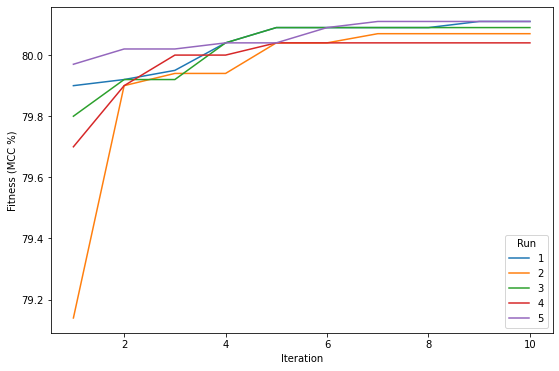

In [30]:
ss = s.pivot(index='Iteration', columns='Run', values='Fitness')
ss.plot(figsize=(9,6))
plt.ylabel('Fitness (MCC %)')
# plt.savefig('sss.jpg', bbox_inches='tight', dpi=600)

In [28]:
run = 0
maxx = 0

for i in range(s.shape[0]):
    s['Fitness'][i] = s['Fitness'][i]
    if run < s['Run'][i]:
        run = s['Run'][i]
        maxx = 0
        
    if s['Fitness'][i] > maxx:
        maxx = s['Fitness'][i]
    else:
        s['Fitness'][i] = maxx

<ipython-input-28-faabd40c4d6e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['Fitness'][i] = s['Fitness'][i]
<ipython-input-28-faabd40c4d6e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['Fitness'][i] = maxx


<AxesSubplot:xlabel='Iteration'>

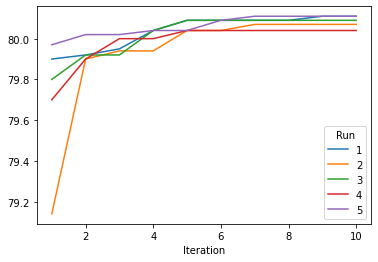

In [33]:
s.pivot(index='Iteration', columns='Run', values='Fitness').plot()